# Yash Meshram
# Computer Vision & Internet of Things
# The Sparks Foundation
#
## Task : Detection of face mask
#
## Traning the model

In [34]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
datasets = r'dataset'
imagePaths = list(paths.list_images(datasets))

In [3]:
imagePaths

['dataset/with_mask/augmented_image_177.jpg',
 'dataset/with_mask/92-with-mask.jpg',
 'dataset/with_mask/augmented_image_136.jpg',
 'dataset/with_mask/325-with-mask.jpg',
 'dataset/with_mask/augmented_image_256.jpg',
 'dataset/with_mask/431-with-mask.jpg',
 'dataset/with_mask/25-with-mask.jpg',
 'dataset/with_mask/340-with-mask.jpg',
 'dataset/with_mask/augmented_image_264.jpg',
 'dataset/with_mask/462-with-mask.jpg',
 'dataset/with_mask/augmented_image_165.jpg',
 'dataset/with_mask/augmented_image_186.jpg',
 'dataset/with_mask/augmented_image_246.jpg',
 'dataset/with_mask/augmented_image_97.jpg',
 'dataset/with_mask/260-with-mask.jpg',
 'dataset/with_mask/augmented_image_149.jpg',
 'dataset/with_mask/augmented_image_230.jpg',
 'dataset/with_mask/105-with-mask.jpg',
 'dataset/with_mask/163-with-mask.jpg',
 'dataset/with_mask/augmented_image_211.jpg',
 'dataset/with_mask/119-with-mask.jpg',
 'dataset/with_mask/267-with-mask.jpg',
 'dataset/with_mask/augmented_image_267.jpg',
 'dataset/w

In [4]:
# x will be our images
# y will be our label

In [5]:
data = []
labels = []

In [6]:
for i in imagePaths:
    label = i.split(os.path.sep)[-2]
    labels.append(label)
    
    image = load_img(i, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)


In [7]:
labels

['with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with_mask',
 'with

In [8]:
data

[array([[[-0.9607843 , -1.        , -0.9764706 ],
         [-0.96862745, -1.        , -1.        ],
         [-0.94509804, -0.9764706 , -0.96862745],
         ...,
         [-1.        , -0.99215686, -0.9764706 ],
         [-1.        , -1.        , -0.9843137 ],
         [-1.        , -1.        , -0.9843137 ]],
 
        [[-0.94509804, -0.99215686, -0.9607843 ],
         [-0.96862745, -1.        , -1.        ],
         [-0.9607843 , -0.99215686, -1.        ],
         ...,
         [-1.        , -0.9843137 , -0.9764706 ],
         [-1.        , -0.9764706 , -0.96862745],
         [-1.        , -0.96862745, -0.9607843 ]],
 
        [[-0.92941177, -0.9764706 , -0.9607843 ],
         [-0.9764706 , -1.        , -1.        ],
         [-0.9764706 , -1.        , -1.        ],
         ...,
         [-1.        , -0.9843137 , -0.9843137 ],
         [-1.        , -0.9843137 , -0.9843137 ],
         [-1.        , -0.9843137 , -0.9843137 ]],
 
        ...,
 
        [[-0.8666667 , -1.        

In [10]:
data = np.array(data, dtype = 'float32')
labels = np.array(labels)

In [11]:
type(data), type(labels)

(numpy.ndarray, numpy.ndarray)

In [15]:
data.shape, labels.shape

((1376, 224, 224, 3), (1376, 2))

In [12]:
labels

array(['with_mask', 'with_mask', 'with_mask', ..., 'without_mask',
       'without_mask', 'without_mask'], dtype='<U12')

In [13]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [14]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, 
                                                    test_size=0.20, 
                                                    random_state=42, 
                                                    stratify=labels)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1100, 224, 224, 3), (276, 224, 224, 3), (1100, 2), (276, 2))

In [21]:
# Now our data is ready now we have to generate more images by this images

In [22]:
aug = ImageDataGenerator(rotation_range=20, 
                         zoom_range=0.15, 
                         width_shift_range=0.2, 
                         height_shift_range=0.2, 
                         shear_range=0.15, 
                         horizontal_flip=True, 
                         vertical_flip=True, 
                         fill_mode='nearest')

In [26]:
# we will not include last layer of mobilenetv2 thus include_top = False


baseModel = MobileNetV2(weights = 'imagenet', include_top = False,
                        input_tensor = Input(shape = (224, 224, 3)))

9412608/9406464 [==============================] - 2s 0us/step


In [27]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [29]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size = (7,7))(headModel)   # last out_relu size is (7,7) therefore here we have to use the same
headModel = Flatten(name = 'Flatten')(headModel)
headModel = Dense(128, activation = 'relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation = 'softmax')(headModel)

model = Model(inputs = baseModel.input, 
              outputs = headModel)

In [32]:
# we are not going to train teh layers of baseModel

for layer in baseModel.layers:
    layer.trainable = False

In [33]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [35]:
learning_rate = 0.0001
Epochs = 20
BS = 12 # Batch Size

opt = Adam(lr = learning_rate, decay = learning_rate/Epochs)    # optimizer

model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])

h = model.fit(
    aug.flow(x_train, y_train, batch_size = BS),
    steps_per_epoch = len(x_train)//BS,
    validation_data = (x_test, y_test),
    validation_steps = len(x_test)//BS,
    epochs = Epochs
)

model.save(r'/home/yash-meshram/Documents/GitHub/mask-detection/mobilenet_v2.model')

/home/yash-meshram/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
91/91 [==============================] - 31s 305ms/step - loss: 0.4850 - accuracy: 0.7730 - val_loss: 0.1386 - val_accuracy: 0.9928
Epoch 2/20
91/91 [==============================] - 25s 276ms/step - loss: 0.2331 - accuracy: 0.9366 - val_loss: 0.0701 - val_accuracy: 0.9964
Epoch 3/20
91/91 [==============================] - 24s 265ms/step - loss: 0.1429 - accuracy: 0.9522 - val_loss: 0.0481 - val_accuracy: 0.9964
Epoch 4/20
91/91 [==============================] - 24s 263ms/step - loss: 0.1204 - accuracy: 0.9678 - val_loss: 0.0372 - val_accuracy: 0.9964
Epoch 5/20
91/91 [==============================] - 24s 262ms/step - loss: 0.0833 - accuracy: 0.9825 - val_loss: 0.0285 - val_accuracy: 0.9964
Epoch 6/20
91/91 [==============================] - 24s 262ms/step - loss: 0.0741 - accuracy: 0.9770 - val_loss: 0.0264 - val_accuracy: 0.9964
Epoch 7/20
91/91 [==============================] - 24s 263ms/step - loss: 0.0717 - accuracy: 0.9779 - val_loss: 0.0229 - val_accuracy: 0.9964

/home/yash-meshram/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: /home/yash-meshram/Documents/GitHub/mask-detection/mobilenet_v2.model/assets


In [36]:
predict = model.predict(x_test, batch_size = BS)
predict = np.argmax(predict, axis = 1)
print(classification_report(y_test.argmax(axis = 1), predict, target_names = lb.classes_))

              precision    recall  f1-score   support

   with_mask       0.99      1.00      1.00       138
without_mask       1.00      0.99      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



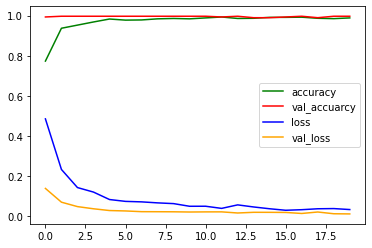

In [40]:
plt.plot(h.history['accuracy'], color = 'g', label = 'accuracy')
plt.plot(h.history['val_accuracy'], color = 'r', label = 'val_accuarcy')

plt.plot(h.history['loss'], color = 'blue', label = 'loss')
plt.plot(h.history['val_loss'], color = 'orange', label = 'val_loss')

plt.legend()